#  Prediction of Graduate Admissions by using Classification technique



In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.drop(columns = 'Serial No.', axis=1, inplace = True)

In [10]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Visualization

#### Univariate Analysis

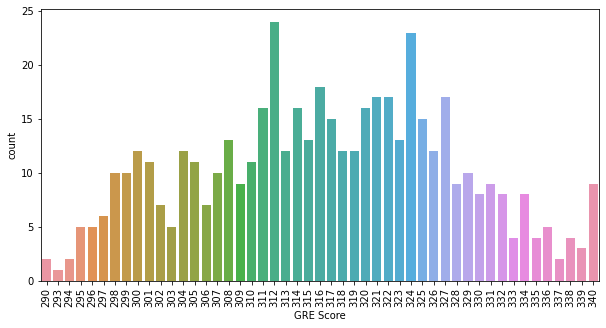

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='GRE Score')
plt.xticks(rotation=90)
plt.show()

In [56]:
df['GRE Score'].value_counts()

312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
298    10
331     9
299     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64

More Students have scored 312 and 324 in GRE.
Only 9 Scored 340.

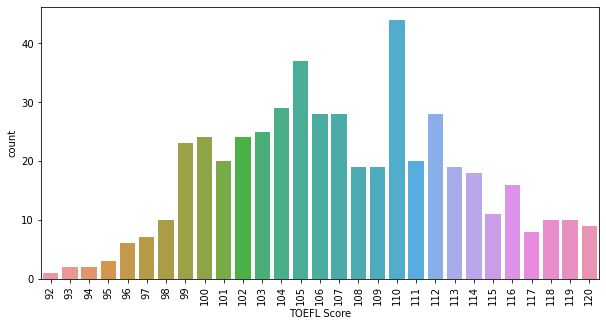

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='TOEFL Score')
plt.xticks(rotation=90)
plt.show()

Most students have scored 110 in TOEFL.

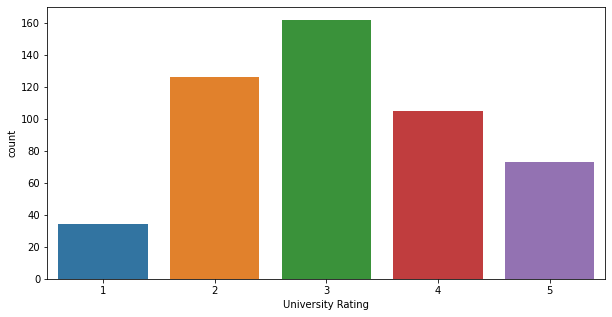

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='University Rating')
plt.show()

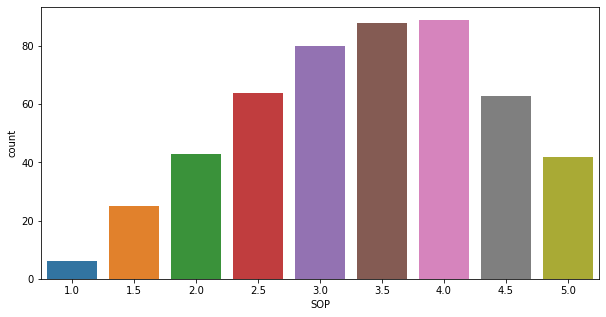

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='SOP')
plt.show()

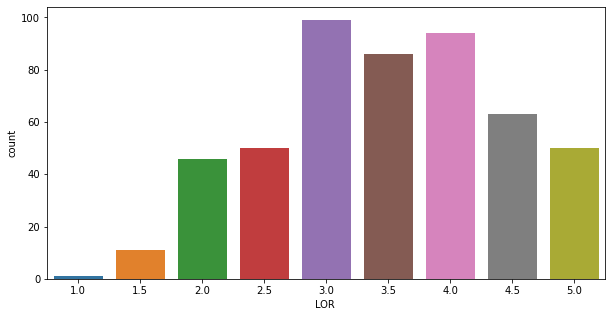

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='LOR ')
plt.show()

<Figure size 720x360 with 0 Axes>

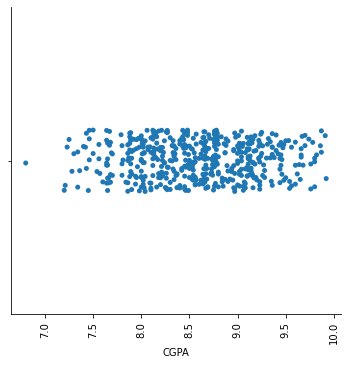

In [16]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x='CGPA')
plt.xticks(rotation=90)
plt.show()

Chance of admitting is greater if CGPA is 8 and above.

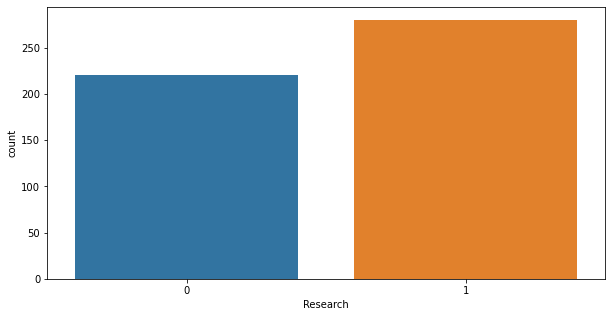

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Research')
plt.show()

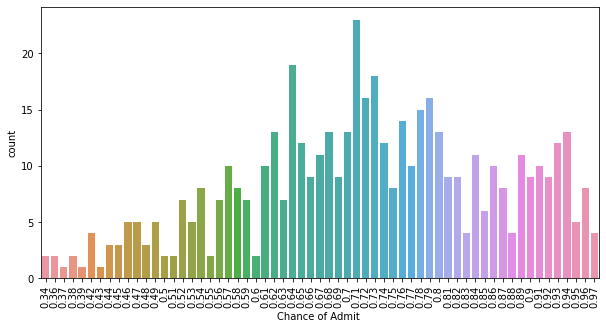

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Chance of Admit ')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Separating values to 0s and 1s
df['Chance_of_admit']=[0 if x<=0.50 else 1 for x in df['Chance of Admit ']]

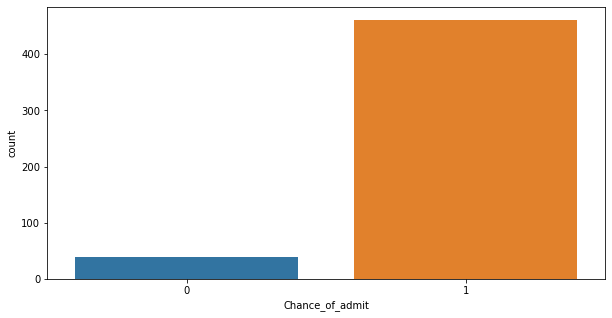

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Chance_of_admit')
plt.show()

In [21]:
df.drop(columns='Chance of Admit ', axis=1 ,inplace = True)

In [22]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


#### Bivariate Analysis

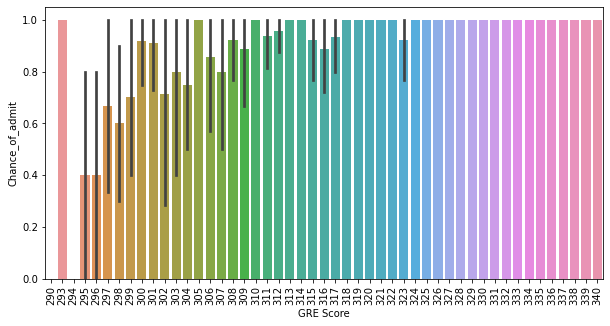

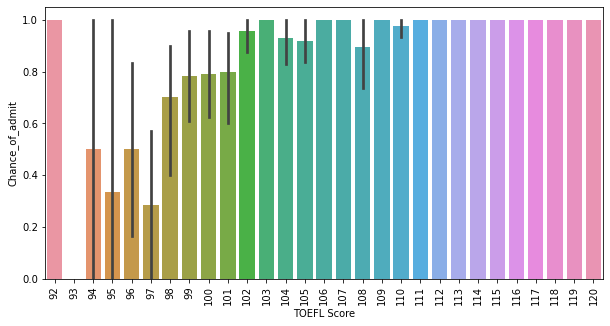

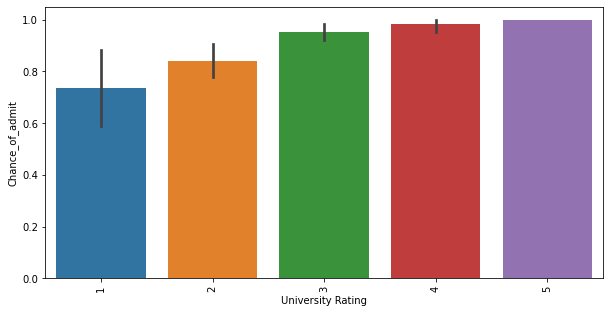

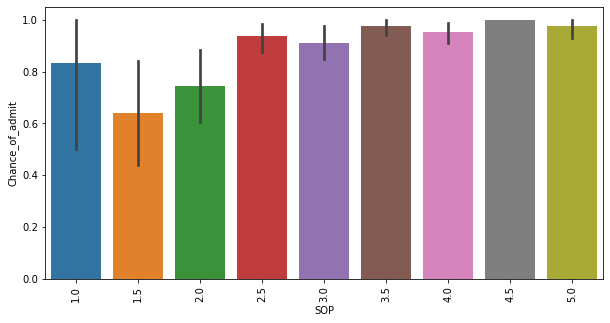

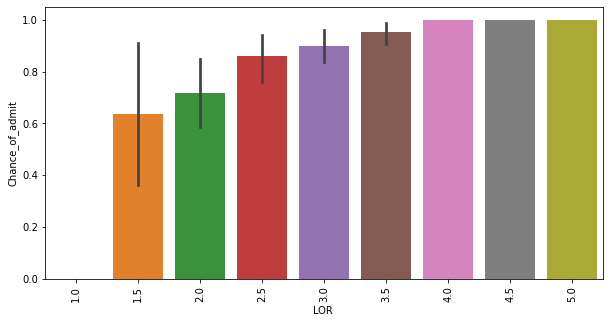

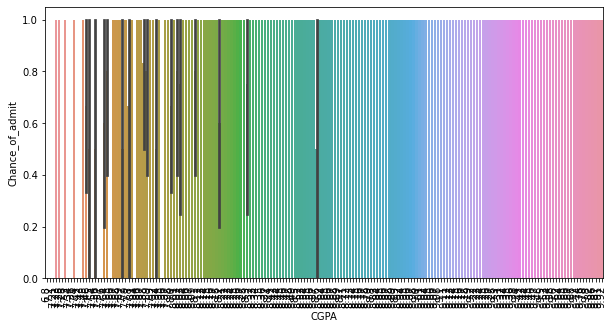

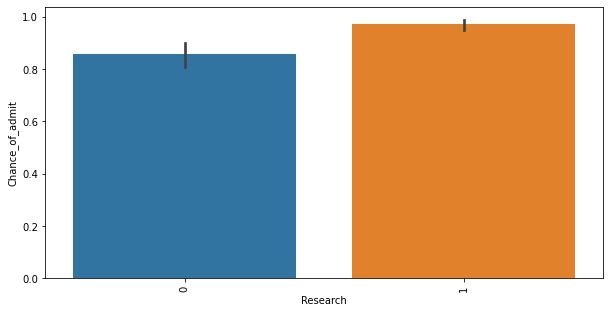

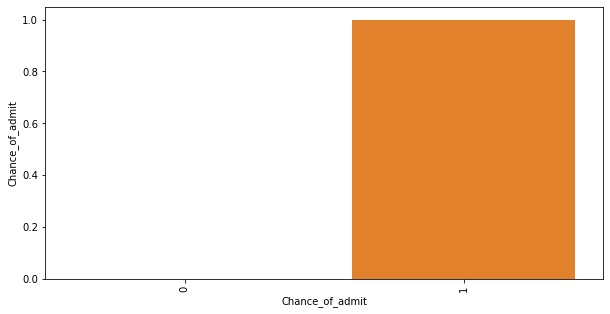

In [23]:
for i in df:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df,y='Chance_of_admit',x=df[i])
    plt.xticks(rotation=90)
    plt.show()

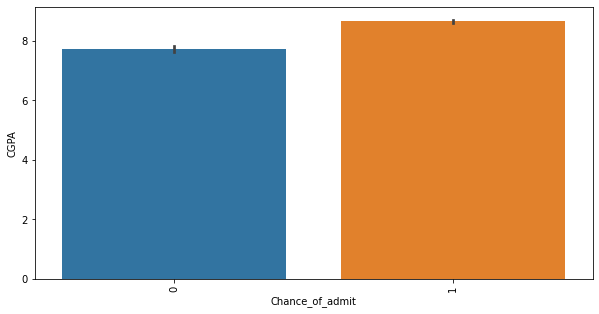

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Chance_of_admit',y='CGPA')
plt.xticks(rotation=90)
plt.show()

candidates with GRE score greater than 323, TOEFL score greater than 110, University rating 5,LOR greater than 4.0 and CGPA greater than 8 have high chance of admit.
SOP can be varied.

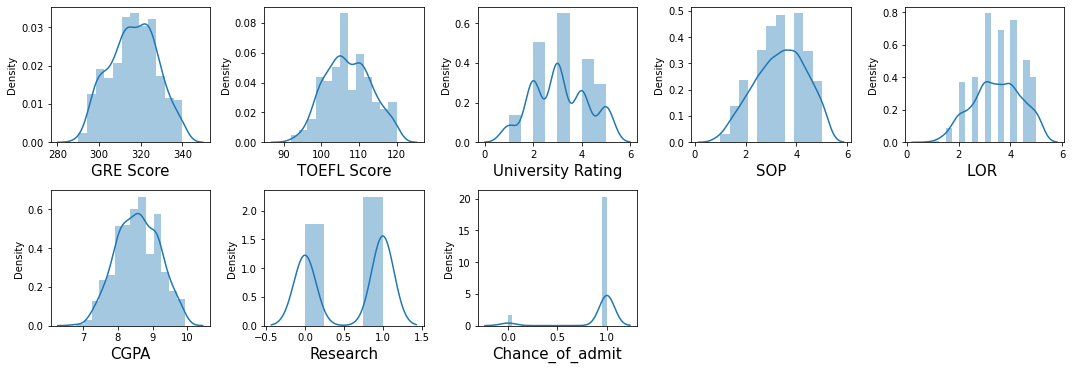

In [24]:
#Displot
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

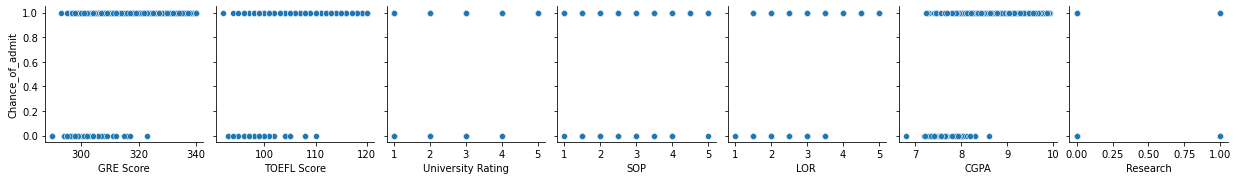

In [25]:
# pairplot wrt target column
sns.pairplot(data=df,x_vars=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'],y_vars='Chance_of_admit')

if the scores are high chance of admitting is high. All attributes are related to each other.

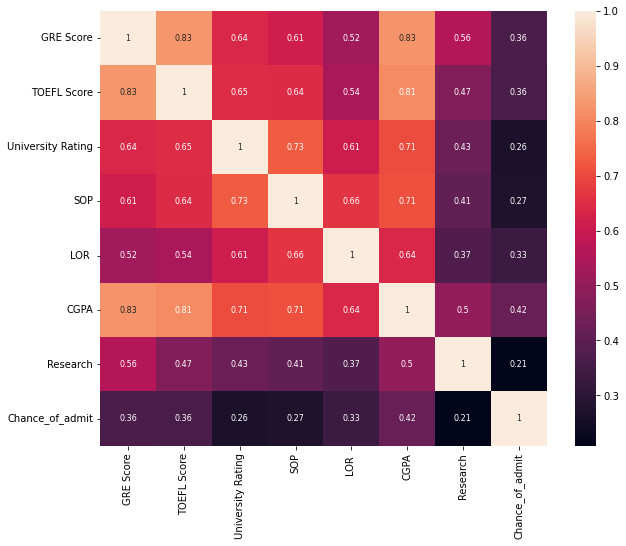

In [26]:
# Drawing Heatmap to check multicolinearity
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':8})
plt.show()

GRE Score is highly correlated with TOEFL Score and CGPA.

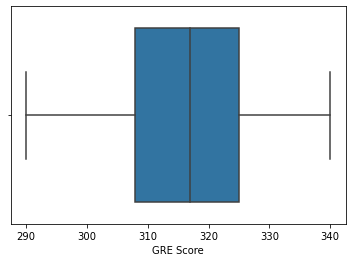

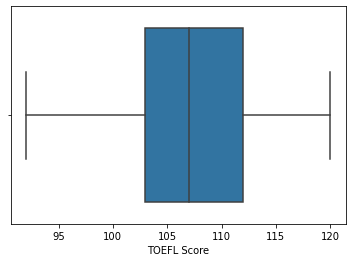

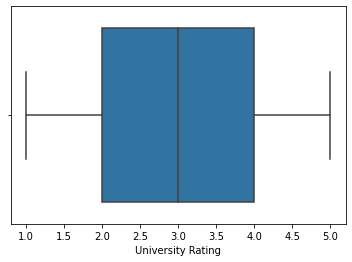

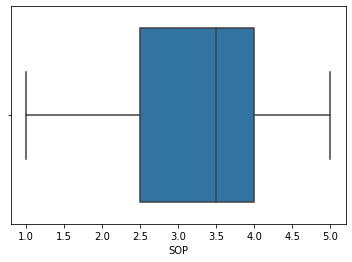

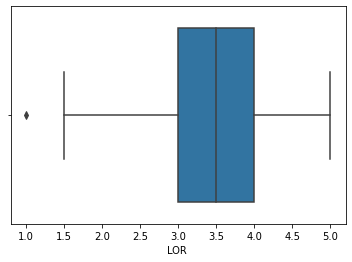

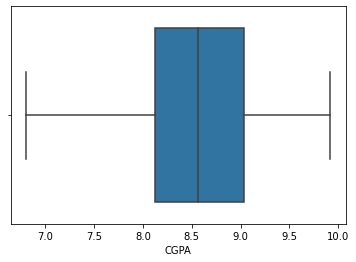

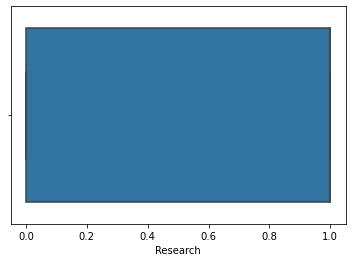

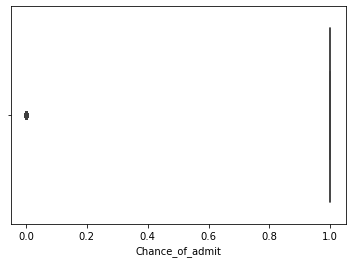

In [27]:
#Boxplot to check the presence of outliers
for i in df.select_dtypes(include=['float','int']):
    sns.boxplot(df[i])
    plt.show()

Outliers are found in LOR, SOP Columns

In [28]:
# Identifying and removing outliers from LOR
q1 = df['LOR '].quantile(0.25)
q3 = df['LOR '].quantile(0.75)
iqr = q3 - q1
# defining upper and lower bound
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
# identifying the outliers
outliers_lor = df[(df['LOR '] < lower_bound) | (df['LOR '] > upper_bound)].index
# removing the outliers
df = df.drop(outliers_lor)

In [30]:
# Identifying and removing outliers from SOP
q1 = df['SOP'].quantile(0.25)
q3 = df['SOP'].quantile(0.75)
iqr = q3 - q1
# defining upper and lower bound
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
# identifying the outliers
outliers_sop= df[(df['SOP'] < lower_bound) | (df['SOP'] > upper_bound)].index
# removing the outliers
df = df.drop(outliers_sop)

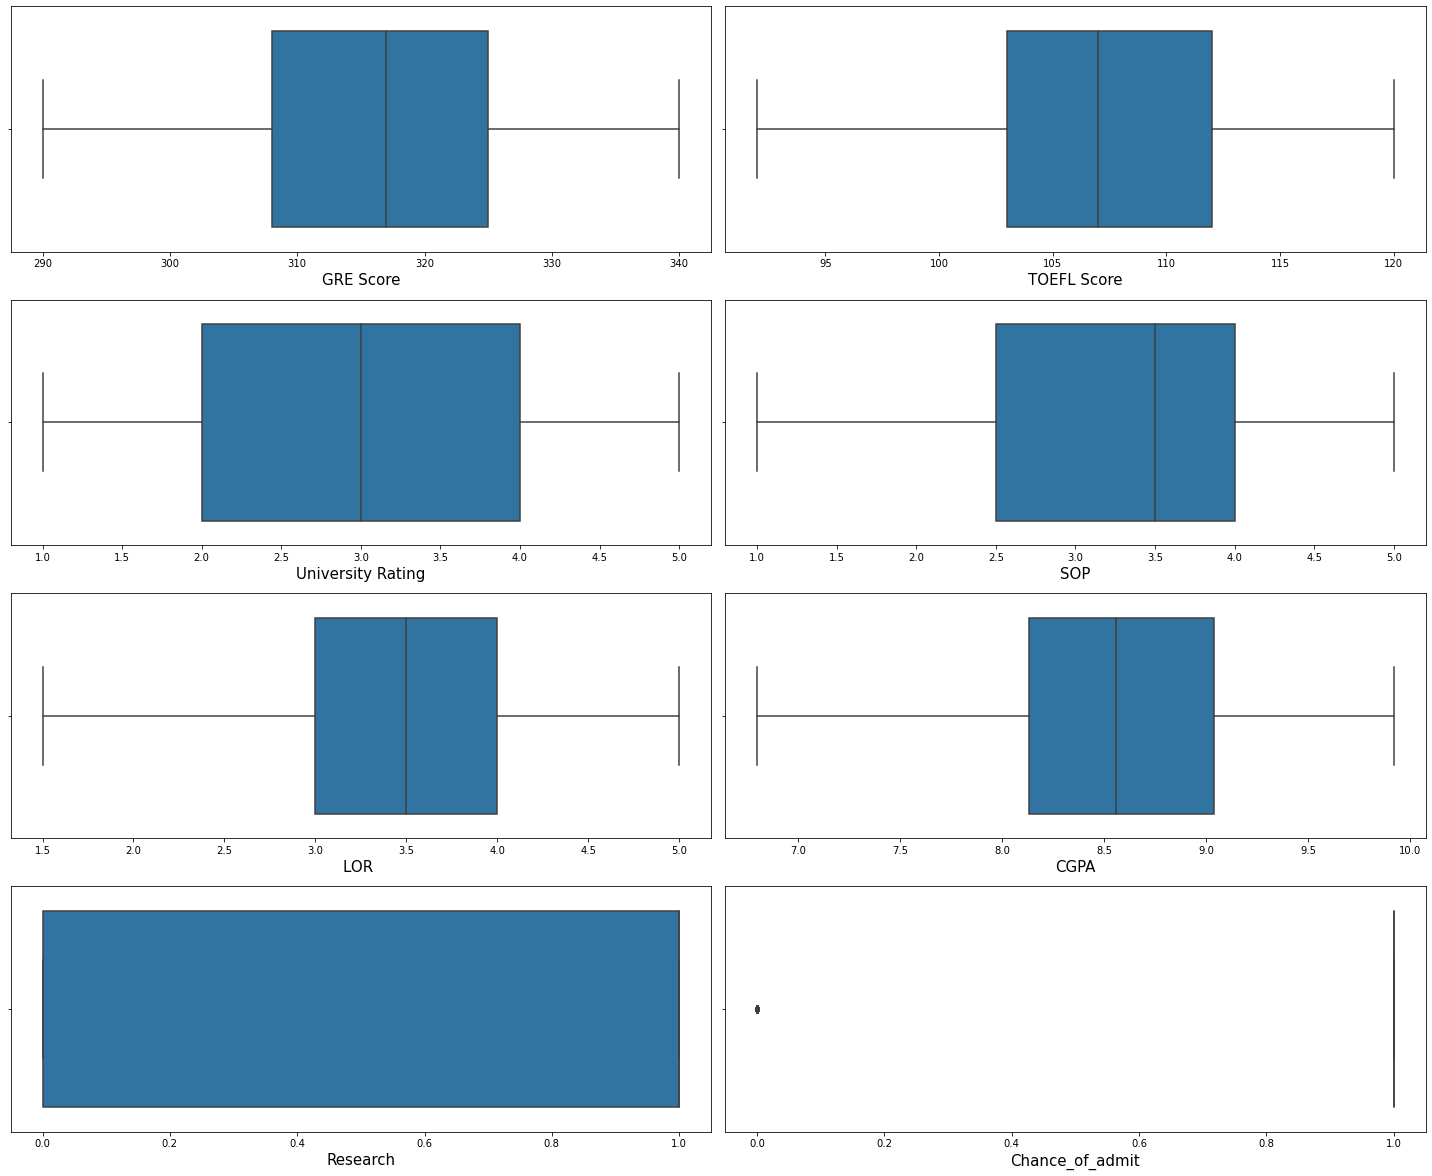

In [31]:
# Checking boxplot if the outliers are removed
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From figure it is observed that outliers are removed successfully.

# Modelling

In [32]:
# We need to separate features and target column
X = df.drop(columns=['Chance_of_admit'])
y = df['Chance_of_admit']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 7)
(100, 7)
(399,)
(100,)


In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [36]:
print(Counter(y_train))
print(Counter(y_train_resampled))

Counter({1: 369, 0: 30})
Counter({1: 369, 0: 369})


In [37]:
cv_scores = []
acc_score = []

### LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [39]:
pred =lr.predict(X_train_resampled)
y_pred = lr.predict(X_test)

In [40]:
accuracy_train = accuracy_score(y_train_resampled, pred)
print("Train Accuracy: ",accuracy_train)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ",accuracy)
scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores: ",scores.mean())
cv_scores.append(scores.mean())
acc_score.append(accuracy)

Train Accuracy:  0.8780487804878049
Test Accuracy:  0.87
Cross Validation Scores:  0.9178383838383839


In [41]:
print(classification_report(y_test, y_pred))
print('******************************************************')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.62      0.43         8
           1       0.96      0.89      0.93        92

    accuracy                           0.87       100
   macro avg       0.65      0.76      0.68       100
weighted avg       0.91      0.87      0.89       100

******************************************************
[[ 5  3]
 [10 82]]


### DECISION TREE 

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [43]:
pred2 =dt.predict(X_train_resampled)
y_pred2 = dt.predict(X_test)

In [44]:
accuracy_train2 = accuracy_score(y_train_resampled, pred2)
print("Train Accuracy: ",accuracy_train2)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Test Accuracy: ",accuracy2)
scores2 = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores: ",scores2.mean())
cv_scores.append(scores2.mean())
acc_score.append(accuracy2)

Train Accuracy:  1.0
Test Accuracy:  0.89
Cross Validation Scores:  0.9037171717171717


In [45]:
print(classification_report(y_test, y_pred2))
print('******************************************************')
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.38      0.62      0.48         8
           1       0.97      0.91      0.94        92

    accuracy                           0.89       100
   macro avg       0.68      0.77      0.71       100
weighted avg       0.92      0.89      0.90       100

******************************************************
[[ 5  3]
 [ 8 84]]


### RANDOM FOREST 

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier()

In [47]:
pred3 =rfc.predict(X_train_resampled)
y_pred3 = rfc.predict(X_test)

In [48]:
accuracy_train3 = accuracy_score(y_train_resampled, pred3)
print("Train Accuracy: ",accuracy_train3)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Test Accuracy: ",accuracy3)
scores3 = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores: ",scores3.mean())
cv_scores.append(scores3.mean())
acc_score.append(accuracy3)

Train Accuracy:  1.0
Test Accuracy:  0.93
Cross Validation Scores:  0.9298585858585857


In [49]:
print(classification_report(y_test, y_pred3))
print('******************************************************')
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.97      0.96      0.96        92

    accuracy                           0.93       100
   macro avg       0.76      0.79      0.77       100
weighted avg       0.93      0.93      0.93       100

******************************************************
[[ 5  3]
 [ 4 88]]


### GRADIENT BOOSTER

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train_resampled,y_train_resampled)

GradientBoostingClassifier()

In [51]:
pred4 =gb.predict(X_train_resampled)
y_pred4 = gb.predict(X_test)

In [52]:
accuracy_train4 = accuracy_score(y_train_resampled, pred4)
print("Train Accuracy: ",accuracy_train4)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Test Accuracy: ",accuracy4)
scores4 = cross_val_score(gb, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores: ",scores4.mean())
cv_scores.append(scores4.mean())
acc_score.append(accuracy4)

Train Accuracy:  0.9905149051490515
Test Accuracy:  0.92
Cross Validation Scores:  0.9298181818181819


In [53]:
print(classification_report(y_test, y_pred4))
print('******************************************************')
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.98      0.93      0.96        92

    accuracy                           0.92       100
   macro avg       0.74      0.84      0.78       100
weighted avg       0.94      0.92      0.93       100

******************************************************
[[ 6  2]
 [ 6 86]]


In [54]:
results = pd.DataFrame({'Accuracy_test_score': acc_score,'Cross Validation Score': cv_scores })
results

,Accuracy_test_score,Cross Validation Score
0,0.87,0.917838
1,0.89,0.903717
2,0.93,0.929859
3,0.92,0.929818


In [55]:
results['least diff'] =abs(results['Accuracy_test_score'] - results['Cross Validation Score'])
results

,Accuracy_test_score,Cross Validation Score,least diff
0,0.87,0.917838,0.047838
1,0.89,0.903717,0.013717
2,0.93,0.929859,0.000141
3,0.92,0.929818,0.009818


By Taking the difference of accuracy test score and crossvalidation score it is obtained that RandomForestClassifier has the least difference with highest accuracy.
So, We can take Random Forest as best classifier.